# Setup

In [1]:
import pandas as pd
import psycopg2 as pg
import os
import sys
import pandas.io.sql as pd_sql
import numpy as np
import sqlalchemy
project_dir = str(os.path.dirname(os.path.abspath('')))
print(project_dir)
sys.path.append(project_dir)

/Users/erik/metis/data_hailing


In [2]:
import matplotlib.pyplot as plt
from src.pickle.pickle_util import save_pickle, load_pickle

In [12]:
def save_figure(plot_title):
    try:
        file_path = project_dir + '/reports/figures/' + 'yellow' + plot_title.lower().replace(" ", "_") + '.svg'
        assert not os.path.exists(file_path)
        plt.savefig(file_path)
        print('file saved: ' + file_path)
    except:
        print('file not saved; file already exists: ' + file_path)
    pass

## Load Data from SQL and save to pickle for convenient access

In [4]:
# engine = sqlalchemy.create_engine('postgresql://localhost:5432/data_hailing')

# query = "SELECT * FROM tnp_trips_2019_pandas WHERE DATE(trip_start_timestamp) = '2019-07-17';"
# trips_df = pd.read_sql_query(query, engine)

In [5]:
file_path = project_dir + '/data/interim/' + 'trips_2019-07-07_from_02_eda.pickle'
# save_pickle(trips_df, file_path)
trips_df = load_pickle(file_path)

In [6]:
trips_df.dtypes

trip_start_timestamp          datetime64[ns]
trip_end_timestamp            datetime64[ns]
trip_seconds                         float64
trip_miles                           float64
pickup_census_tract                  float64
dropoff_census_tract                 float64
pickup_community_area                float64
dropoff_community_area               float64
fare                                 float64
tip                                  float64
additional_charges                   float64
trip_total                           float64
shared_trip_authorized                  bool
trips_pooled                         float64
pickup_centroid_latitude             float64
pickup_centroid_longitude            float64
dropoff_centroid_latitude            float64
dropoff_centroid_longitude           float64
dtype: object

In [7]:
trips_df.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total,shared_trip_authorized,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude
0,2019-07-17 11:30:00,2019-07-17 11:45:00,857.0,4.5,1.703108e+10,1.703106e+10,8.0,6.0,10.0,0.0,2.55,12.55,False,1.0,41.907520,-87.626659,41.949221,-87.651970
1,2019-07-17 19:00:00,2019-07-17 19:15:00,1181.0,5.6,1.703132e+10,1.703122e+10,32.0,22.0,12.5,12.0,2.55,27.05,False,1.0,41.884987,-87.620993,41.928465,-87.695087
2,2019-07-17 23:45:00,2019-07-17 23:45:00,779.0,5.4,1.703108e+10,1.703183e+10,8.0,6.0,10.0,0.0,2.55,12.55,False,1.0,41.900221,-87.629105,41.945170,-87.668794
3,2019-07-17 18:15:00,2019-07-17 19:15:00,3877.0,26.5,NaN,1.703132e+10,NaN,32.0,42.5,0.0,2.55,45.05,False,1.0,NaN,NaN,41.884987,-87.620993
4,2019-07-17 22:30:00,2019-07-17 22:45:00,671.0,4.2,1.703108e+10,1.703106e+10,8.0,6.0,7.5,0.0,2.55,10.05,False,1.0,41.892042,-87.631864,41.943155,-87.640698


## Check fraction of trips with a non-zero tip

In [8]:
(trips_df.loc[:, 'tip'] > 0).mean()

0.2178897964583899

There are about 22% of trips that have a tip. This is good to know because it means the data with work for a classification model

## Histograms

### Histogram of times of trip by hour

file saved: /Users/erik/metis/data_hailing/reports/figures/yellownumber_of_rides_starting_by_hour_on_2017-07-17.svg


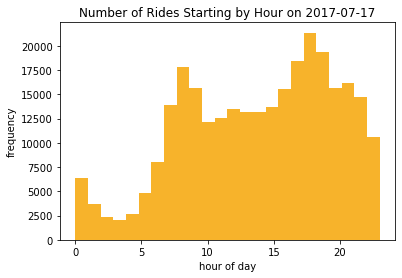

In [13]:
plt.hist(trips_df.trip_start_timestamp.dt.hour, bins=24, color='#f7b32b')
plot_title = 'Number of Rides Starting by Hour on 2017-07-17'
plt.title(plot_title)

plt.xlabel('hour of day')
plt.ylabel('frequency')
save_figure(plot_title)

file saved: /Users/erik/metis/data_hailing/reports/figures/yellownumber_of_rides_ending_by_hour_on_2017-07-17.svg


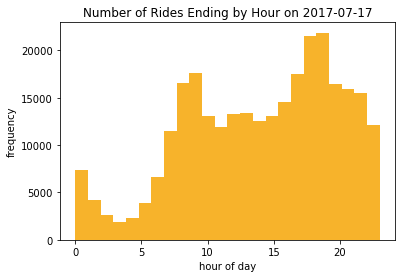

In [14]:
plt.hist(trips_df.trip_end_timestamp.dt.hour, bins=24, color='#f7b32b')
plot_title = 'Number of Rides Ending by Hour on 2017-07-17'
plt.title(plot_title)

plt.xlabel('hour of day')
plt.ylabel('frequency')
save_figure(plot_title)

### Histogram of trips by hour of day in the loop

The loop is community area 32

file saved: /Users/erik/metis/data_hailing/reports/figures/yellownumber_of_rides_starting_by_hour_in_the_loop.svg


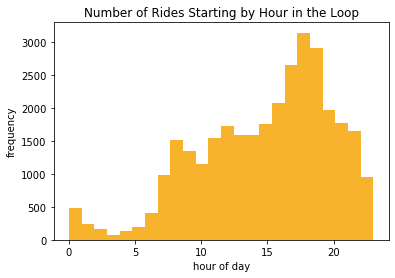

In [15]:
loop = trips_df[trips_df.pickup_community_area == 32]
plt.hist(loop.trip_start_timestamp.dt.hour, bins=24, color='#f7b32b')
plot_title = 'Number of Rides Starting by Hour in the Loop'
plt.title(plot_title)
plt.xlabel('hour of day')
plt.ylabel('frequency')

save_figure(plot_title)

file saved: /Users/erik/metis/data_hailing/reports/figures/yellownumber_of_rides_ending_in_the_loop_by_hour.svg


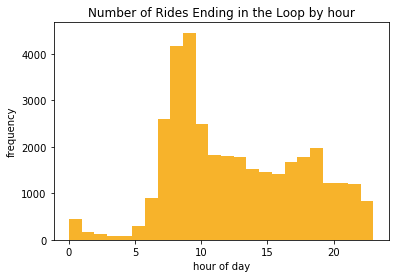

In [16]:
loop = trips_df[trips_df.dropoff_community_area == 32]
fig = plt.hist(loop.trip_end_timestamp.dt.hour, bins=24, color='#f7b32b')
plot_title = 'Number of Rides Ending in the Loop by hour'
plt.title(plot_title)
plt.xlabel('hour of day')
plt.ylabel('frequency')

save_figure(plot_title)

### Histogram of rides starting or ending in near north side

file saved: /Users/erik/metis/data_hailing/reports/figures/yellownumber_of_trips_starting_in_the_near_north_side_by_hour.svg


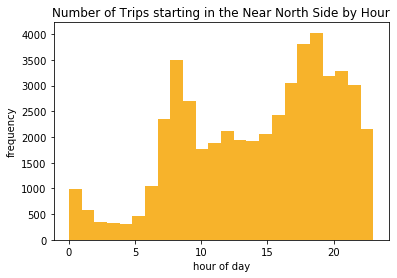

In [17]:
near_north_side = trips_df[trips_df.pickup_community_area == 8]
plt.hist(near_north_side.trip_start_timestamp.dt.hour, bins=24, color='#f7b32b')
plot_title = 'Number of Trips starting in the Near North Side by Hour'
plt.title(plot_title)
plt.xlabel('hour of day')
plt.ylabel('frequency')

save_figure(plot_title)

file saved: /Users/erik/metis/data_hailing/reports/figures/yellownumber_of_tripes_ending_in_the_near_north_side_by_hour.svg


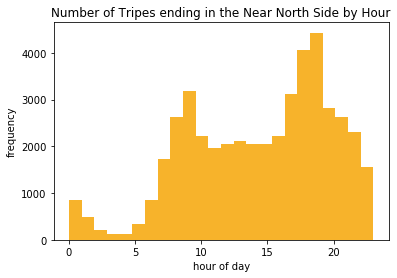

In [18]:
near_north_side = trips_df[trips_df.dropoff_community_area == 8]
plt.hist(near_north_side.trip_end_timestamp.dt.hour, bins=24, color='#f7b32b')
plot_title = 'Number of Tripes ending in the Near North Side by Hour'
plt.title(plot_title)
plt.xlabel('hour of day')
plt.ylabel('frequency')

save_figure(plot_title)

### Make hour histogram for community area 50 (Pullman)

Community area 50 is a randomly selected one with a small total number of trips. It is Pullman and is in the far north east side

file saved: /Users/erik/metis/data_hailing/reports/figures/yellownumber_of_trips_starting_in_pullman_by_hour.svg


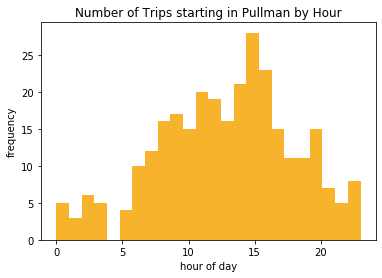

In [20]:
community = trips_df[trips_df.pickup_community_area == 50.0]
plt.hist(community.trip_start_timestamp.dt.hour, bins=24, color='#f7b32b')
plot_title = 'Number of Trips starting in Pullman by Hour'
plt.title(plot_title)
plt.xlabel('hour of day')
plt.ylabel('frequency')

save_figure(plot_title)

file saved: /Users/erik/metis/data_hailing/reports/figures/yellownumber_of_trips_ending_in_pullman_by_hour.svg


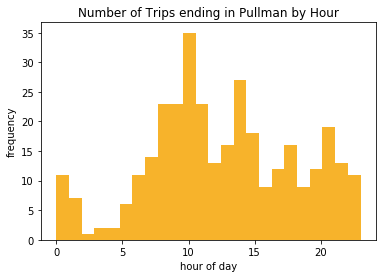

In [21]:
community = trips_df[trips_df.dropoff_community_area == 50.0]
plt.hist(community.trip_end_timestamp.dt.hour, bins=24, color='#f7b32b')

plot_title = 'Number of Trips ending in Pullman by Hour'
plt.title(plot_title)
plt.xlabel('hour of day')
plt.ylabel('frequency')

save_figure(plot_title)

## Histrogram of rides by area in Near West Side

Near West Side is community Area 28

file saved: /Users/erik/metis/data_hailing/reports/figures/yellownumber_of_rides_starting_in_near_west_loop_by_hour.svg


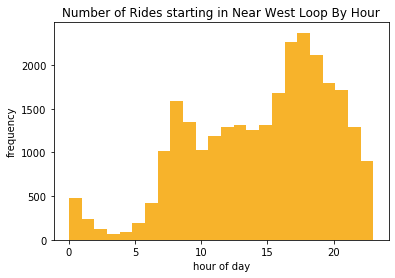

In [22]:
community = trips_df[trips_df.pickup_community_area == 28.0]
plt.hist(community.trip_start_timestamp.dt.hour, bins=24, color='#f7b32b')
plot_title = 'Number of Rides starting in Near West Loop By Hour'
plt.title(plot_title)
plt.xlabel('hour of day')
plt.ylabel('frequency')
pass
save_figure(plot_title)

file saved: /Users/erik/metis/data_hailing/reports/figures/yellownumber_of_rides_ending_in_near_west_loop_by_hour.svg


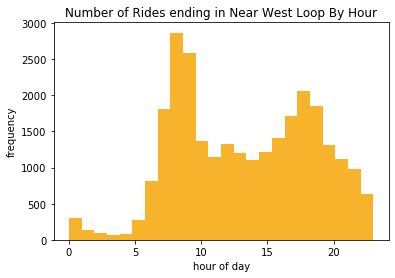

In [23]:
community = trips_df[trips_df.dropoff_community_area == 28.0]
plot_title = 'Number of Rides ending in Near West Loop By Hour'
plt.hist(community.trip_end_timestamp.dt.hour, bins=24, color='#f7b32b')
plt.title(plot_title)
plt.xlabel('hour of day')
plt.ylabel('frequency')

save_figure(plot_title)

# Community areas with most pickups and dropoffs

In [36]:
trips_df.groupby('pickup_community_area').tip.count().sort_values(ascending=False).head(10)

pickup_community_area
8.0     49237
32.0    32072
28.0    27112
6.0     17464
24.0    15965
7.0     13882
76.0    12432
22.0     8711
33.0     5845
3.0      5351
Name: tip, dtype: int64

names of those
```
8.0     49237    Near North Side
32.0    32072    Loop
28.0    27112    Near West Side
6.0     17464    Lake View
24.0    15965    West Town
7.0     13882    Lincoln Park
76.0    12432    O'Hare
22.0     8711    Logan Square
33.0     5845    Near South Side
3.0      5351    Uptown
```

In [42]:
trips_df.groupby('dropoff_community_area').tip.count().sort_values(ascending=False).head(10)

dropoff_community_area
8.0     46118
32.0    35573
28.0    27477
6.0     16798
76.0    15076
24.0    14278
7.0     12996
22.0     8522
33.0     5381
3.0      5096
Name: tip, dtype: int64

names of those
```
8.0     46118     Near North Side
32.0    35573     Loop
28.0    27477     Near West Side
6.0     16798     Lake View
76.0    15076     O'Hare
24.0    14278     West Town
7.0     12996     East Garfield Park
22.0     8522     Logan Square
33.0     5381     Near South Side
3.0      5096     Uptown
```

### Histogram of trip durations

file saved: /Users/erik/metis/data_hailing/reports/figures/duration_of_trip_in_minutes.svg


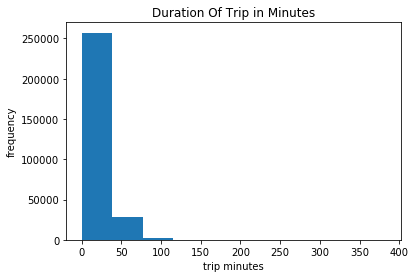

In [65]:
plt.hist(trips_df.trip_seconds/60)
plt.xlabel('trip minutes')
plt.ylabel('frequency')
plot_title = 'Duration Of Trip in Minutes'
plt.title(plot_title)
save_figure(plot_title)

file saved: /Users/erik/metis/data_hailing/reports/figures/trip_duration_in_minutes.svg


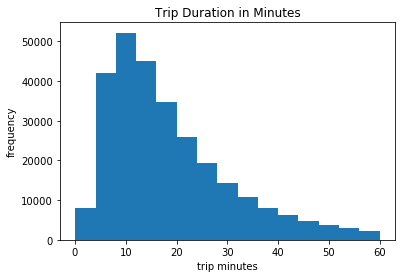

In [66]:
shorter_trips = trips_df.trip_seconds[trips_df.trip_seconds < (60 * 60)]
plt.hist(shorter_trips/60, bins=15)
plt.xlabel('trip minutes')
plt.ylabel('frequency')
plot_title = 'Trip Duration in Minutes'
plt.title(plot_title)

save_figure(plot_title)